In [1]:
import numpy as np
from matplotlib import pylab as plt
from skimage import transform

In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

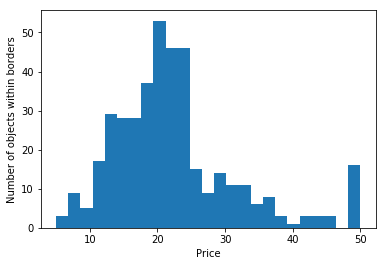

In [3]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

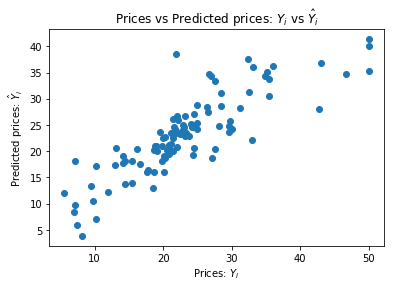

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [6]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406724
mse = 23.195599256422998
prediction variance = 45.78048685033721


## processing

In [7]:
cycles = 100 # number of averaging cycles

mae_array = np.zeros(len(X_train))
mse_array = np.zeros(len(X_train))
r2_array = np.zeros(len(X_train))

mae_d_array = np.zeros(len(X_train)) # mae dispersion
mse_d_array = np.zeros(len(X_train)) # mse dispersion

for i in range(len(X_train)):
    for j in range(cycles):
        rand_samples = np.random.choice(np.arange(len(X_train)), size=i+1, replace=False)
        (X_train_part, y_train_part) = (X_train[rand_samples], y_train[rand_samples])
        
        lm.fit(X_train_part, y_train_part)
        y_pred = lm.predict(X_test)
        
        mae_array[i] += mean_absolute_error(y_test, y_pred)
        mse_array[i] += mean_squared_error(y_test, y_pred)
        r2_array[i] += r2_score(y_test, y_pred)
        
        mae_d_array[i] += mean_absolute_error(np.full((len(y_test), 1), mean_absolute_error(y_test, y_pred)), 
                                              np.absolute(y_test - y_pred))
        mse_d_array[i] += mean_squared_error(np.full((len(y_test), 1), mean_squared_error(y_test, y_pred)), 
                                             (y_test - y_pred)**2)
        
    mae_array[i] /= cycles
    mse_array[i] /= cycles
    r2_array[i] /= cycles
    
    mae_d_array[i] /= cycles
    mse_d_array[i] /= cycles

## mean absolute error

Text(0,0.5,'mean absolute error')

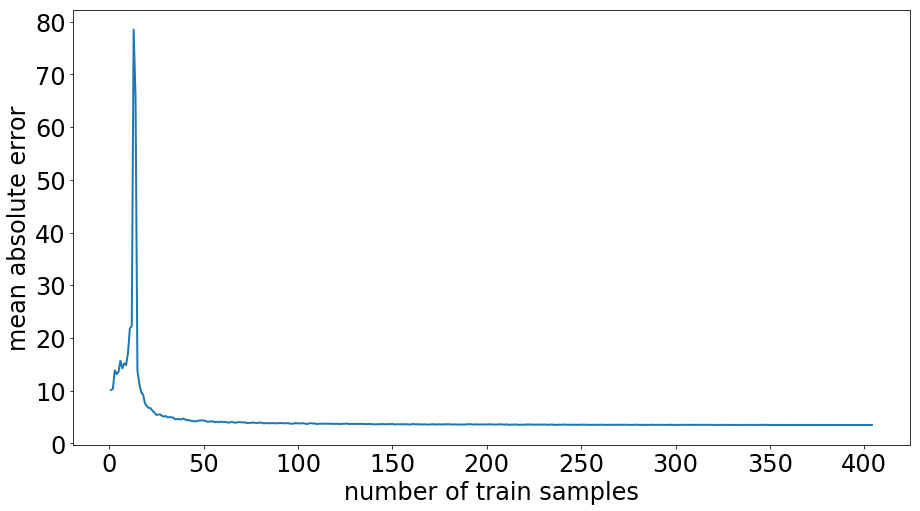

In [45]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(15,8))
plt.plot(np.arange(1, len(X_train) + 1), mae_array)
plt.xlabel("number of train samples")
plt.ylabel("mean absolute error")

Text(0,0.5,'mean absolute error dispersion')

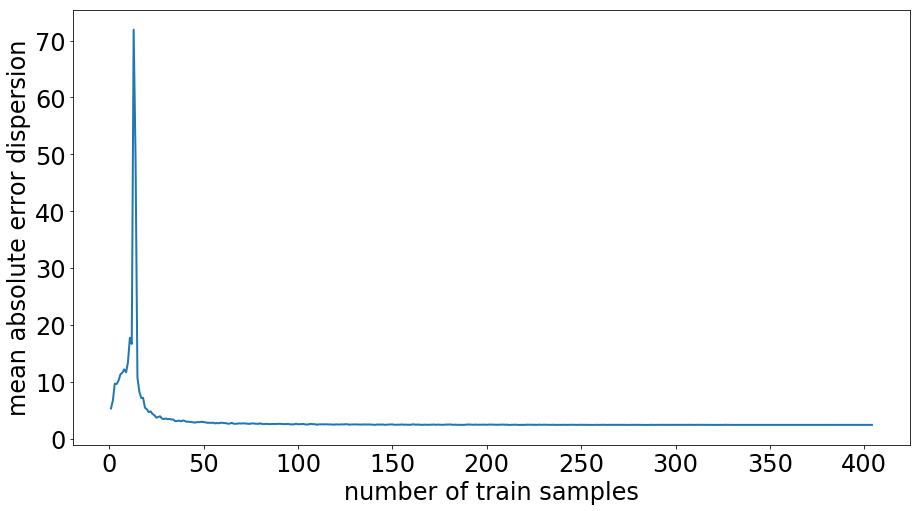

In [46]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(1, len(X_train) + 1), mae_d_array)
plt.xlabel("number of train samples")
plt.ylabel("mean absolute error dispersion")

## mean squared error

Text(0,0.5,'mean squared error')

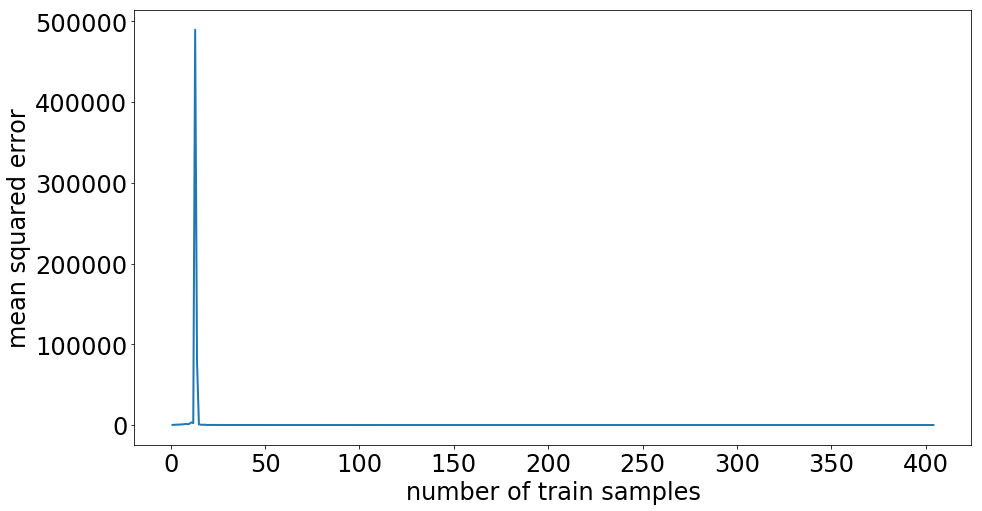

In [50]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(1, len(X_train) + 1), mse_array)
plt.xlabel("number of train samples")
plt.ylabel("mean squared error")

Text(0,0.5,'mean squared error dispersion')

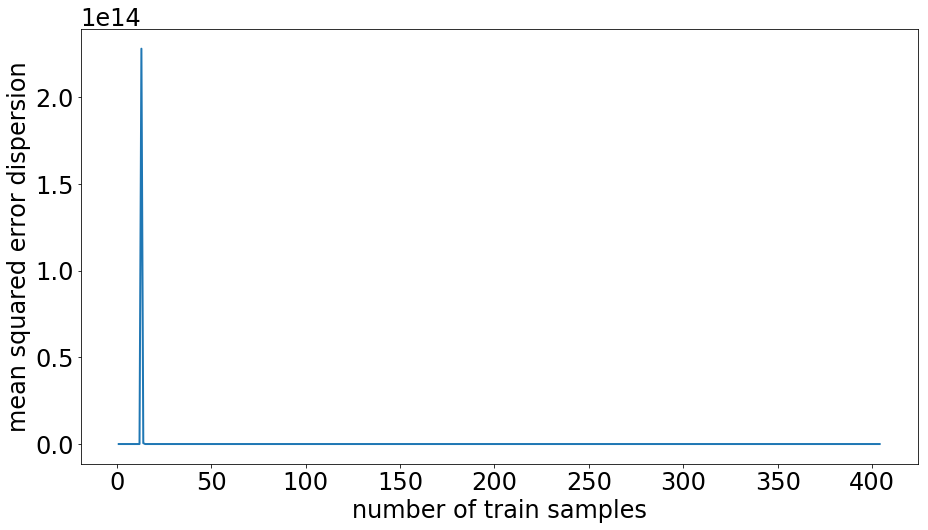

In [51]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(1, len(X_train) + 1), mse_d_array)
plt.xlabel("number of train samples")
plt.ylabel("mean squared error dispersion")

## r2 score

Text(0,0.5,'r2 score')

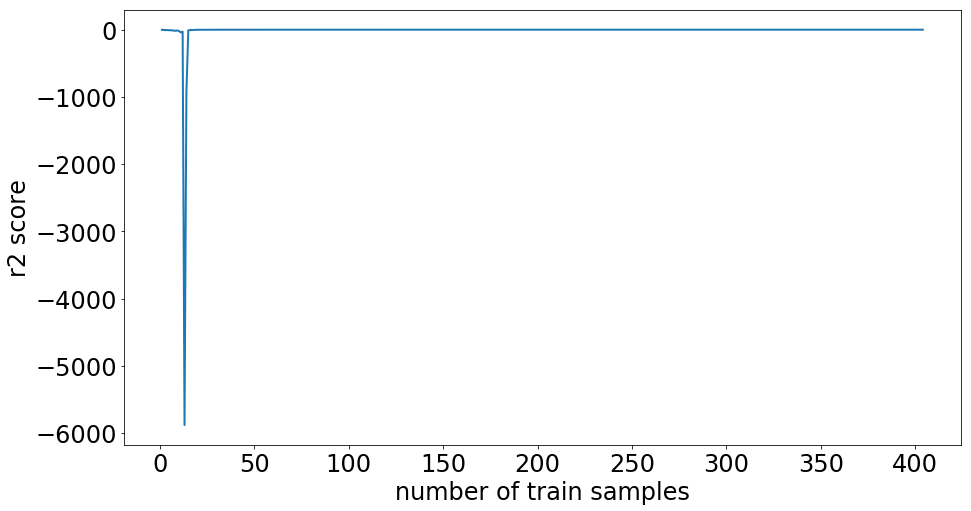

In [52]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(1, len(X_train) + 1), r2_array)
plt.xlabel("number of train samples")
plt.ylabel("r2 score")